In [1]:
# PROBLEM STATEMENT 1
import pandas as pd
data = pd.read_csv('VGsales_datasets.csv')
atari_2600_sales = data[(data['Platform'] == '2600') & (data['Publisher'] == 'Atari') & (data['Year'].isin([1980, 1981]))]
atari_2600_trends = atari_2600_sales.groupby('Year').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()
atari_2600_trends.to_csv('PS1_atari_2600_trends.csv', index=False)
atari_2600_trends

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,59.74,3.80,0.0,0.70,64.3
1,1981.0,47.22,2.82,0.0,0.48,50.7


In [2]:
# PROBLEM STATEMENT 2
genre_performance = atari_2600_sales.groupby(['Year', 'Genre']).agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()

genre_performance.to_csv('PS2_genre_performance.csv', index=False)
genre_performance

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,Misc,7.26,0.36,0.0,0.06,7.74
1,1980.0,Shooter,52.48,3.44,0.0,0.64,56.56
2,1981.0,Action,15.06,0.90,0.0,0.18,16.14
3,1981.0,Platform,5.40,0.30,0.0,0.06,5.82
4,1981.0,Puzzle,9.24,0.60,0.0,0.12,9.90
5,1981.0,Shooter,11.64,0.72,0.0,0.12,12.54
6,1981.0,Simulation,2.52,0.12,0.0,0.00,2.70
7,1981.0,Sports,3.36,0.18,0.0,0.00,3.60


In [3]:
# PROBLEM STATEMENT 3

na_data = data[data['NA_Sales']>0]
eu_data = data[data['EU_Sales'] > 0]
na_genre_sales = na_data.groupby('Genre')['NA_Sales'].sum().reset_index()
eu_genre_sales = eu_data.groupby('Genre')['EU_Sales'].sum().reset_index()
merged_data = pd.merge(na_genre_sales, eu_genre_sales, on='Genre', suffixes=('_NA', '_EU'))
merged_data['Sales_Diff'] = merged_data['NA_Sales'] - merged_data['EU_Sales']
merged_data = merged_data.sort_values('Sales_Diff', ascending=False)

merged_data.to_csv('PS3_regional_genre_popularity.csv', index=False)
merged_data

,Genre,NA_Sales,EU_Sales,Sales_Diff
0,Action,2586.82,1570.31,1016.51
8,Shooter,1967.92,995.42,972.50
10,Sports,1897.69,1139.00,758.69
4,Platform,1093.28,506.42,586.86
3,Misc,1007.43,535.66,471.77
2,Fighting,544.84,259.08,285.76
7,Role-Playing,820.91,543.87,277.04
6,Racing,874.70,616.21,258.49
5,Puzzle,306.56,127.90,178.66
9,Simulation,419.73,284.13,135.60


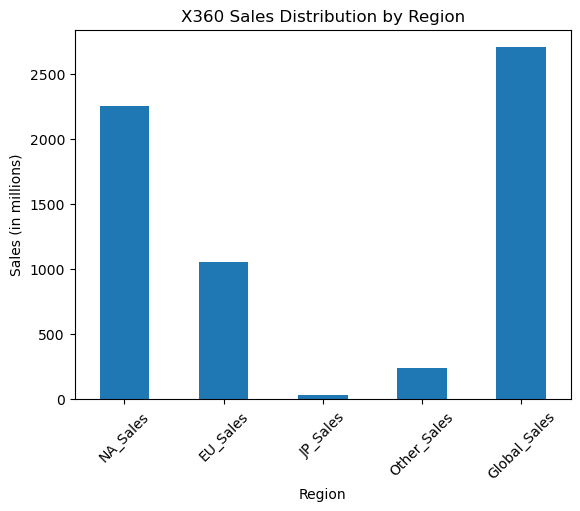

NA_Sales        2254.34
EU_Sales        1053.62
JP_Sales          30.51
Other_Sales      237.30
Global_Sales    2704.23
dtype: float64

In [4]:
# PROBLEM STATEMENT 4
import matplotlib.pyplot as plt
x360_data = data[data['Platform'] == 'X360']
x360_sales_summary = x360_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
x360_sales_summary.plot(kind='bar', title='X360 Sales Distribution by Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

x360_sales_summary


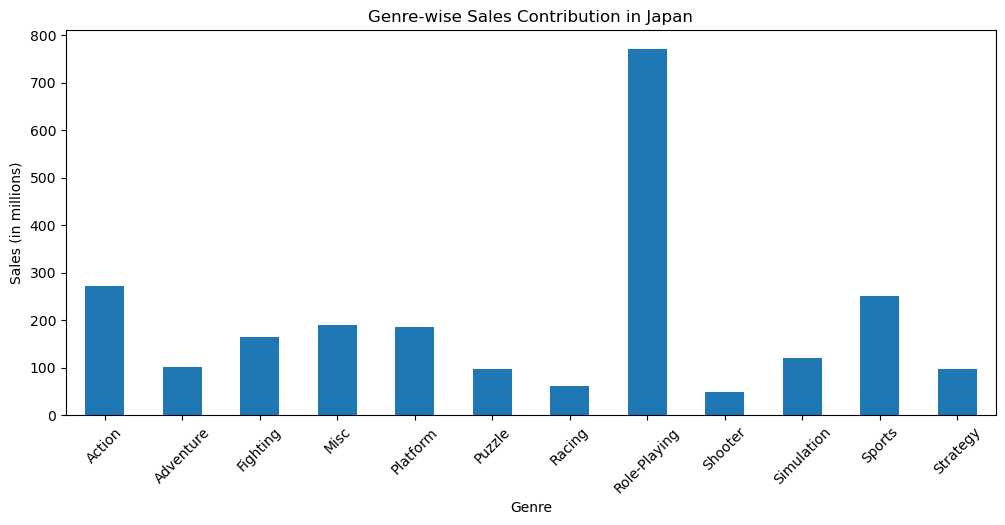

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,114.92,63.89,272.64,39.84,352.56
Adventure,20.55,11.98,101.66,2.07,81.47
Fighting,66.63,34.30,164.45,11.87,189.09
Misc,36.45,28.22,188.95,4.90,163.25
Platform,138.69,58.63,186.56,7.42,287.13
Puzzle,54.70,19.69,98.24,3.13,122.26
Racing,38.05,18.87,62.52,13.23,98.96
Role-Playing,218.97,187.76,771.37,38.22,806.78
Shooter,48.68,13.10,49.51,2.94,88.49


In [5]:
# PROBLEM STATEMENT 5
jp_higher_than_eu = data[data['JP_Sales'] > data['EU_Sales']]
jp_higher_than_eu.to_csv('PS5_JP_Sales.csv', index=False)
genre_sales_contribution = jp_higher_than_eu.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales',
                                                               'Global_Sales']].sum()
genre_sales_contribution['JP_Sales'].plot(kind='bar', figsize=(12, 5), title='Genre-wise Sales Contribution in Japan')
plt.ylabel('Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()
genre_sales_contribution

In [6]:
# PROBLEM STATEMENT 6
ps3_sports_games = data[(data['Platform'] == 'PS3') & (data['Genre'] == 'Sports')]
ps3_sports_sorted = ps3_sports_games.sort_values(by='Global_Sales', ascending=False)

ps3_sports_sorted.to_csv('PS6_sportsps.csv', index=False)
ps3_sports_sorted

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,NA_Cumulative_Sales
22222,113.0,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,NaN,NaN
23559,113.0,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,10s,NaN
22809,113.0,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,NaN,NaN
38930,113.0,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,10s,NaN
22759,122.0,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16205,NaN,Jikkyou Powerful Pro Baseball 2016,PS3,2016.0,Sports,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
16232,NaN,Madden NFL 17,PS3,2016.0,Sports,NaN,0.05,0.01,NaN,NaN,NaN,NaN,NaN
16243,NaN,Pro Evolution Soccer 2017,PS3,2016.0,Sports,NaN,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16273,NaN,NBA 2K17,PS3,2016.0,Sports,NaN,0.03,0.01,NaN,NaN,NaN,NaN,NaN


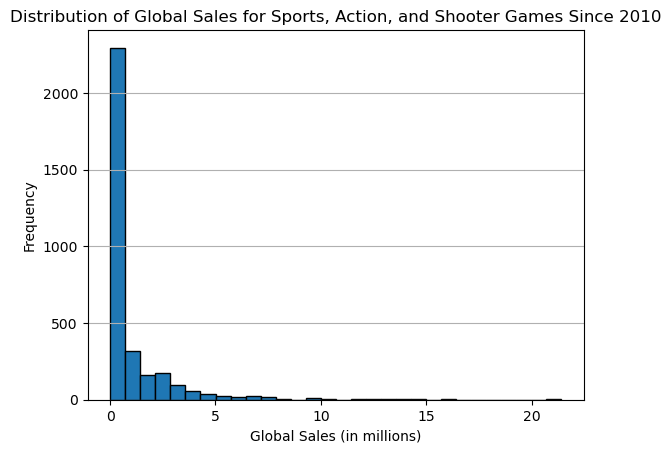

Summary of Global Sales for action & shooter games since 2010:
count    3253.000000
mean        0.992930
std         1.910596
min         0.010000
25%         0.080000
50%         0.260000
75%         0.950000
max        21.400000
Name: Global_Sales, dtype: float64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,NA_Cumulative_Sales
11295,NaN,Call of Duty: Black Ops,X360,2010.0,Shooter,NaN,9.67,3.73,NaN,NaN,NaN,NaN,NaN
11296,NaN,Call of Duty: Black Ops,PS3,2010.0,Shooter,NaN,5.98,4.44,NaN,NaN,NaN,NaN,NaN
11298,NaN,Halo: Reach,X360,2010.0,Shooter,NaN,7.03,1.98,NaN,NaN,NaN,NaN,NaN
11302,NaN,Zumba Fitness,Wii,2010.0,Sports,NaN,3.50,2.64,NaN,NaN,NaN,NaN,NaN
11303,NaN,Red Dead Redemption,PS3,2010.0,Action,NaN,2.79,2.61,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41002,16534.0,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.00,0.0,0.01,10s,NaN
41003,16553.0,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01,10s,NaN
41006,16572.0,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.0,0.01,10s,NaN
41008,16579.0,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.0,0.01,10s,NaN


In [7]:
# PROBLEM STATEMENT 7
sports_action_shooter_2010 = data[(data['Genre'].isin(['Sports', 'Action', 'Shooter'])) & (data['Year'] >= 2010)]
plt.hist(sports_action_shooter_2010['Global_Sales'], bins=30, edgecolor='black')
plt.title('Distribution of Global Sales for Sports, Action, and Shooter Games Since 2010')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

print("Summary of Global Sales for action & shooter games since 2010:")
print(sports_action_shooter_2010['Global_Sales'].describe())
sports_action_shooter_2010

In [8]:
# PROBLEM STATEMENT 8
atari_2600_80_81 = data[(data['Platform']=='2600') & (data['Publisher']=='Atari') & (data['Year'].isin([1980, 1981]))]
genre_releases = atari_2600_80_81.groupby('Genre').size().reset_index(name='Num_Releases')
genre_releases['Global_Sales'] = atari_2600_80_81.groupby('Genre')['Global_Sales'].sum().values

genre_releases.to_csv('PS8_genre_releases.csv', index=False)
genre_releases

,Genre,Num_Releases,Global_Sales
0,Action,18,16.14
1,Misc,12,7.74
2,Platform,6,5.82
3,Puzzle,6,9.90
4,Shooter,28,69.10
5,Simulation,6,2.70
6,Sports,18,3.60


In [22]:
# PROBLEM STATEMENT 9
high_sales_genres = data[(data['Genre'].isin(['Sports', 'Action', 'Shooter'])) & (data['Global_Sales'] > 2)]
high_sales_genres = high_sales_genres[(high_sales_genres['Genre'] != 'Puzzle') & 
                                      (high_sales_genres['Genre'] != 'Fighting') & 
                                      (high_sales_genres['Genre'] != 'Racing')]
high_sales_genres.to_csv('PS9_high_sales_genres.csv', index=False)
high_sales_genres

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,NA_Cumulative_Sales
0,259.0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,NaN,NaN
1,545.0,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,NaN,NaN
10,736.0,Frogger,2600,1981.0,Action,Parker Bros.,2.06,0.12,0.00,0.02,2.20,1980s,NaN
11,768.0,Demon Attack,2600,1981.0,Shooter,Imagic,1.99,0.12,0.00,0.02,2.13,1980s,NaN
55,259.0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40669,772.0,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14,2010s,NaN
41010,259.0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,NaN,NaN
41011,545.0,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,NaN,NaN
41020,736.0,Frogger,2600,1981.0,Action,Parker Bros.,2.06,0.12,0.00,0.02,2.20,1980s,NaN


In [23]:
# PROBLEM STATEMENT 10
decades = {(1990, 1999):'1990s',(2000, 2009):'2000s',(2010, 2016):'2010s'}
min_sales = 2
max_sales = 10  
data['Decade'] = data['Year'].apply(lambda y: decades.get((y // 10 * 10, y // 10 * 10 + 9)))
filtered_data = data[ (data['Global_Sales']>= min_sales) & (data['Global_Sales']<= max_sales) & data['Decade'].notnull()]

genre_sales_by_decade = filtered_data.pivot_table(values='Global_Sales', index='Decade', columns='Genre', aggfunc=sum)
genre_sales_by_decade

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Decade,,,,,,,,,,,,
1990s,320.19,38.11,129.56,65.33,322.37,20.06,185.95,97.30,123.93,38.02,64.65,78.02
2000s,1087.02,48.83,206.27,394.53,305.17,90.79,346.54,461.32,679.43,185.65,650.00,21.86


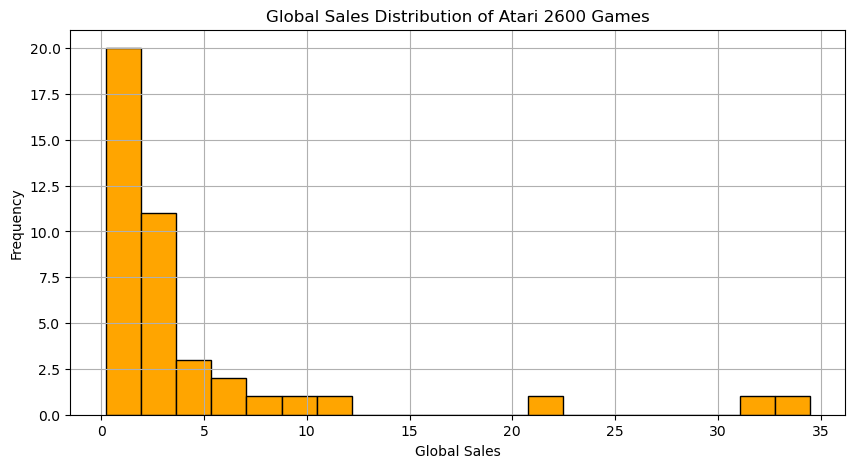

Summary Statistics of Global Sales:
count    42.000000
mean      4.673333
std       7.481486
min       0.210000
25%       1.275000
50%       2.235000
75%       4.170000
max      34.480000
Name: Global_Sales, dtype: float64


Top Performing Games:
Name
Asteroids                      34.48
Pac-Man                        31.24
Missile Command                22.08
E.T.: The Extra Terrestrial    11.82
Ms. Pac-Man                     9.90
Centipede                       8.16
Defender                        6.30
Donkey Kong Junior              5.82
Dig Dug                         4.92
Mario Bros.                     4.77
Name: Global_Sales, dtype: float64


Underperforming Games:
Name
Super Baseball           0.21
Super Football           0.24
Krull                    0.42
Klax                     0.45
Desert Falcon            0.78
RealSports Volleyball    0.78
RealSports Boxing        0.87
Solaris                  1.11
Gravitar                 1.14
Pengo                    1.20
Name: Global_

In [11]:
# PROBLEM STATEMENT 11
atari_2600_data = data[(data['Platform'] == '2600') & (data['Publisher'] == 'Atari')]
game_sales = atari_2600_data.groupby('Name')['Global_Sales'].sum()
top_games = game_sales.nlargest(10)
underperforming_games = game_sales.nsmallest(10)

plt.figure(figsize=(10,5))
game_sales.hist(bins=20, color='orange', edgecolor='black')
plt.title('Global Sales Distribution of Atari 2600 Games')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()
print("Summary Statistics of Global Sales:")
print(game_sales.describe())
print("\n\nTop Performing Games:")
print(top_games)
print("\n\nUnderperforming Games:")
print(underperforming_games)

top_games.to_csv('PS11_top_performing_atari2600_games.csv', header=True)
underperforming_games.to_csv('PS11_underperforming_atari2600_games.csv', header=True)
print("\nCSV files saved successfully!!")

In [12]:
# PROBLEM STATEMENT 12
year_range= range(2000, 2010)
racing_data = data[data['Genre'] == 'Racing']
highest_eu_per_year = racing_data.groupby(['Year'])['EU_Sales'].idxmax()
filtered_df = data.loc[highest_eu_per_year.tolist()]
top_5_racing_eu_sales = filtered_df[['Name', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(5)

top_5_racing_eu_sales.to_csv('PS12_racing_eusales_unique.csv')
top_5_racing_eu_sales

,Name,EU_Sales
8432,Mario Kart Wii,12.88
5282,Mario Kart DS,7.57
2433,Gran Turismo 3: A-Spec,5.09
11297,Gran Turismo 5,4.88
12554,Mario Kart 7,3.91


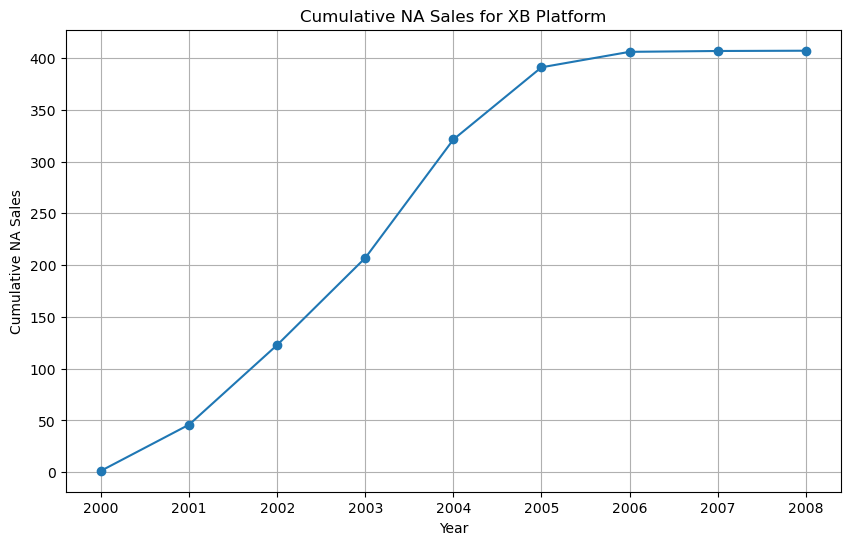

,NA_Sales,JP_Sales,Cumulative_NA_Sales
Year,,,
2000.0,1.48,0.00,1.48
2001.0,44.55,0.58,46.03
2002.0,76.97,0.60,123.00
2003.0,84.04,0.30,207.04
2004.0,114.31,0.30,321.35
2005.0,69.68,0.02,391.03
2006.0,14.94,0.00,405.97
2007.0,0.82,0.00,406.79
2008.0,0.26,0.00,407.05


In [13]:
# PROBLEM STATEMENT 13
xb_games = data[data['Platform'] == 'XB']
xb_sales_by_year = xb_games.groupby('Year')[['NA_Sales', 'JP_Sales']].sum()
xb_sales_by_year['Cumulative_NA_Sales'] = xb_sales_by_year['NA_Sales'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(xb_sales_by_year.index, xb_sales_by_year['Cumulative_NA_Sales'], marker='o')
plt.xlabel('Year')
plt.ylabel('Cumulative NA Sales')
plt.title('Cumulative NA Sales for XB Platform')
plt.grid(True)
plt.show()
xb_sales_by_year

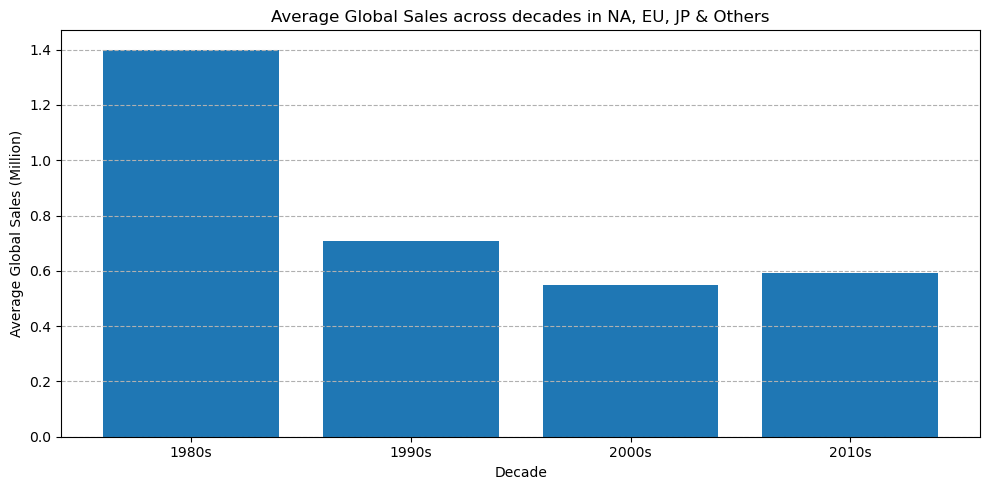

Decade
1980s    1.399916
1990s    0.708789
2000s    0.548399
2010s    0.591628
Name: Global_Sales, dtype: float64

In [14]:
# PROBLEM STATEMENT 14
decade_bins = [1980,1990,2000,2010,2017]
decade_labels = ['1980s','1990s','2000s','2010s']
data['Decade'] = pd.cut(data['Year'], decade_bins, labels=decade_labels)
data['Global_Sales'] = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
avg_global_sales_by_decade = data.groupby(['Decade'])['Global_Sales'].mean()

plt.figure(figsize=(10, 5))
plt.bar(avg_global_sales_by_decade.index, avg_global_sales_by_decade.values)
plt.xlabel('Decade')
plt.ylabel('Average Global Sales (Million)')
plt.title('Average Global Sales across decades in NA, EU, JP & Others')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

avg_global_sales_by_decade

In [15]:
# PROBLEM STATEMENT 15
atari_2600_games = data[(data['Platform'] == '2600') & (data['Publisher'] == 'Atari')]
atari_2600_stats = atari_2600_games.describe()
sales_by_genre = atari_2600_games.groupby('Genre').sum(numeric_only=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', 
                                                                           'Other_Sales', 'Global_Sales']]
sales_by_publisher = atari_2600_games.groupby('Publisher').sum(numeric_only=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', 
                                                                                   'Other_Sales', 'Global_Sales']]
correlation_matrix = atari_2600_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

In [16]:
# PS-15 RESULTS
print("Descriptive Statistics for Atari 2600 Sales Data:")
atari_2600_stats

Descriptive Statistics for Atari 2600 Sales Data:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Cumulative_Sales
count,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,0.0
mean,3928.380682,1982.005682,1.038580,0.063864,0.0,0.011420,1.113864,NaN
std,2976.291923,2.054951,1.317414,0.084067,0.0,0.015847,1.416928,NaN
min,90.000000,1980.000000,0.070000,0.000000,0.0,0.000000,0.070000,NaN
25%,1638.000000,1981.000000,0.240000,0.010000,0.0,0.000000,0.250000,NaN
50%,2845.000000,1981.000000,0.670000,0.040000,0.0,0.010000,0.720000,NaN
75%,6539.000000,1982.000000,1.140000,0.072500,0.0,0.010000,1.222500,NaN
max,11751.000000,1989.000000,7.280000,0.450000,0.0,0.080000,7.810000,NaN


In [17]:
# PS-15 RESULTS
print("Sales by Genre:")
sales_by_genre

Sales by Genre:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,21.36,1.29,0.0,0.24,22.89
Adventure,1.14,0.06,0.0,0.00,1.20
Misc,7.26,0.36,0.0,0.06,7.68
Platform,17.97,1.05,0.0,0.21,19.23
Puzzle,45.50,2.88,0.0,0.53,48.91
Racing,3.30,0.21,0.0,0.03,3.54
Shooter,77.74,4.94,0.0,0.91,83.59
Simulation,2.52,0.12,0.0,0.00,2.64
Sports,6.00,0.33,0.0,0.03,6.36


In [18]:
# PS-15 RESULTS
print("\nSales by Publisher:")
sales_by_publisher


Sales by Publisher:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Atari,182.79,11.24,0.0,2.01,196.04


In [19]:
# PS-15 RESULTS
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.998293,NaN,0.982857,0.999989
EU_Sales,0.998293,1.000000,NaN,0.985431,0.998532
JP_Sales,NaN,NaN,NaN,NaN,NaN
Other_Sales,0.982857,0.985431,NaN,1.000000,0.983479
Global_Sales,0.999989,0.998532,NaN,0.983479,1.000000
